# Projet  python 

La base de données 'Adult' est open-source, extraite du site suivant : UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Adult

Listing of attributes: 

>50K, <=50K. 

age: continuous. 

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous. 

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

education-num: continuous. 

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

sex: Female, Male. 

capital-gain: continuous. 

capital-loss: continuous. 

hours-per-week: continuous. 

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

La base contient 32 561 observations, 14 variables explicatives et 1 variable réponse.

## Importation et exploration des données

In [102]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn 

# obtenir les graphiques dans le notebook
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
df=pd.read_excel('C:/Users/Juliette/Desktop/adult.xlsx')

In [3]:
print(df.shape)

(32561, 15)


In [7]:
df=df.drop('fnlwgt',axis=1)
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Variables qualitatives

In [3]:
qual=df.describe(include=[np.object])
qual

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


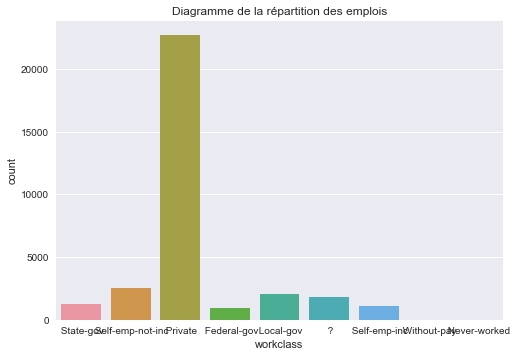

In [4]:
plt.title("Diagramme de la répartition des emplois")
sns.countplot(df.workclass)
plt.savefig("workclass.png")

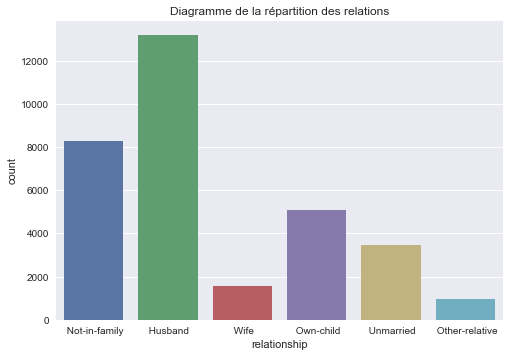

In [5]:
plt.title("Diagramme de la répartition des relations")
sns.countplot(df.relationship)
plt.savefig("relationship.png")

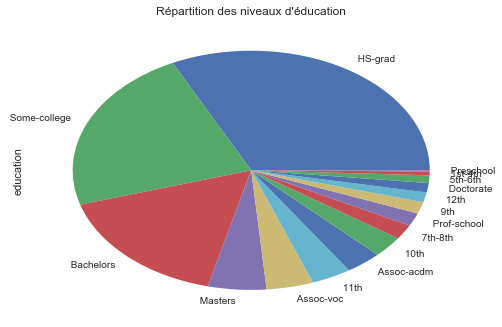

In [6]:
plt.title("Répartition des niveaux d'éducation")
df['education'].value_counts().plot.pie()
plt.savefig("education.png")

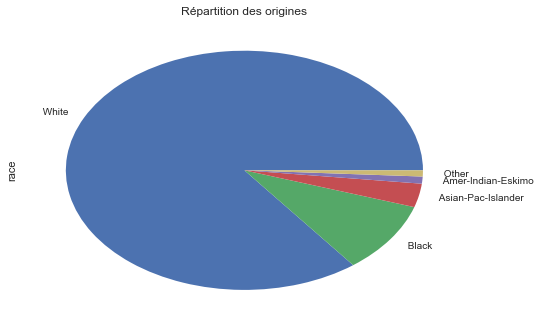

In [7]:
plt.title("Répartition des origines")
df['race'].value_counts().plot.pie()
plt.savefig("race.png")

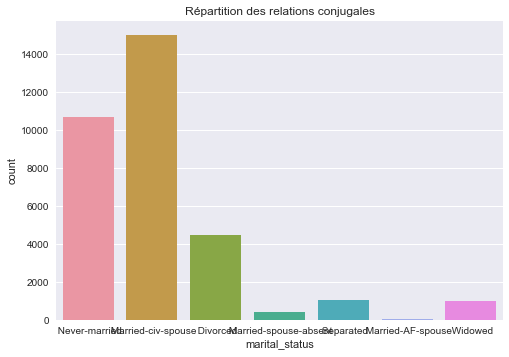

In [8]:
plt.title("Répartition des relations conjugales")
sns.countplot(df.marital_status)
plt.savefig("marital_status.png")

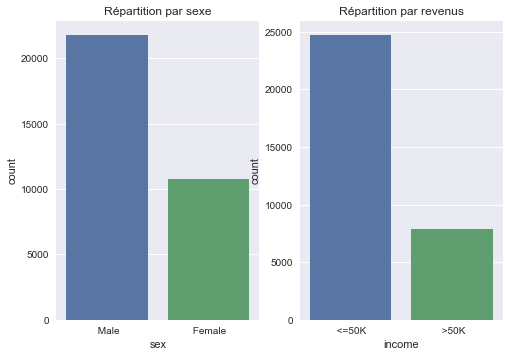

In [9]:
plt.subplot(121)
plt.title("Répartition par sexe")
sns.countplot(df.sex)
plt.subplot(122)
plt.title("Répartition par revenus")
sns.countplot(df.income)
plt.savefig("sc.png")

### Variables quantitatives

In [8]:
quant=df.describe(include=[np.number])
quant

,age,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


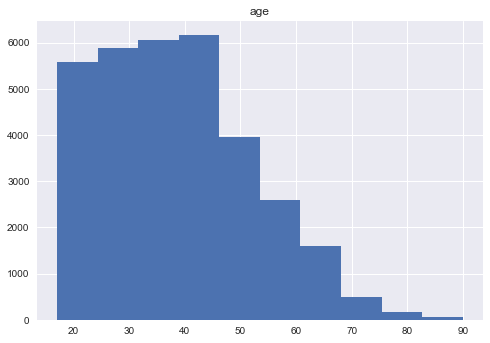

In [12]:
df.hist('age')
plt.savefig("age.png")

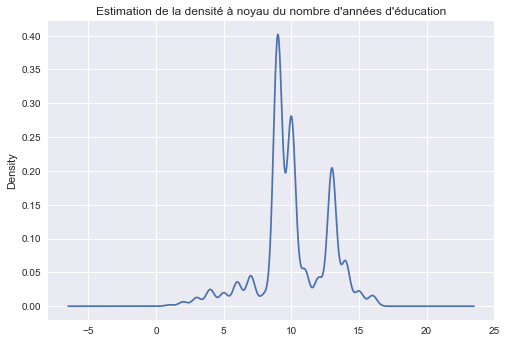

In [13]:
plt.title("Estimation de la densité à noyau du nombre d'années d'éducation")
df['education_num'].plot.kde()
plt.savefig("education_num.png")

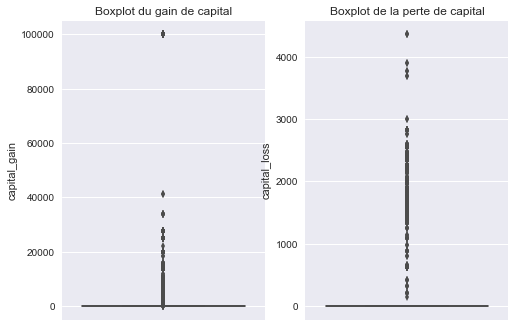

In [14]:
plt.subplot(121)
plt.title("Boxplot du gain de capital")
sns.boxplot(y=df.capital_gain)
plt.subplot(122)
plt.title("Boxplot de la perte de capital")
sns.boxplot(y=df.capital_loss)
plt.savefig("capital.png")

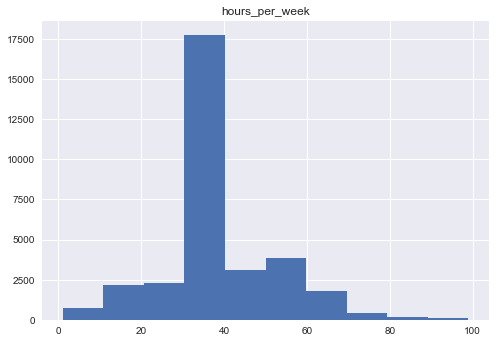

In [16]:
df.hist('hours_per_week')
plt.savefig("hours_per_week.png")

### Etude bivariée

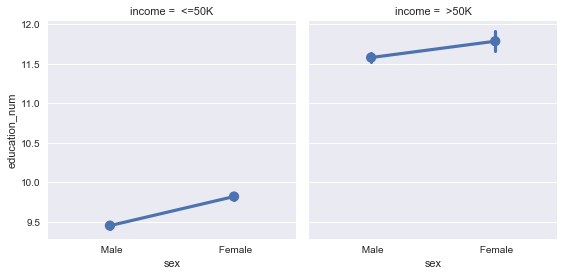

In [17]:
sns.factorplot(data=df, x="sex", y="education_num",col="income")
plt.savefig("ed_sex.png")

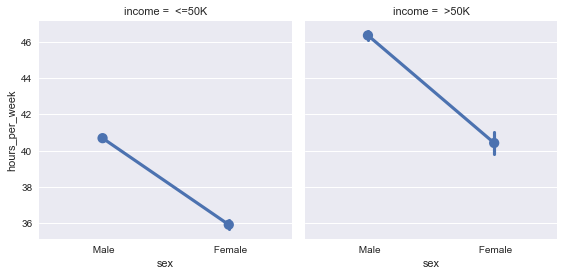

In [18]:
sns.factorplot(data=df, x="sex", y="hours_per_week",col="income")
plt.savefig("hours_sex.png")

In [4]:
corr=df.corr()
corr

,age,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,0.036527,0.077674,0.057775,0.068756
education_num,0.036527,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,0.148123,0.078409,0.054256,1.000000


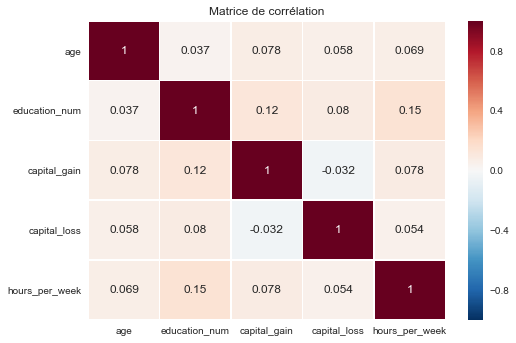

In [5]:
plt.title('Matrice de corrélation')
sns.heatmap(corr, annot=True, linewidths=.5)
plt.savefig("corrélation.png")

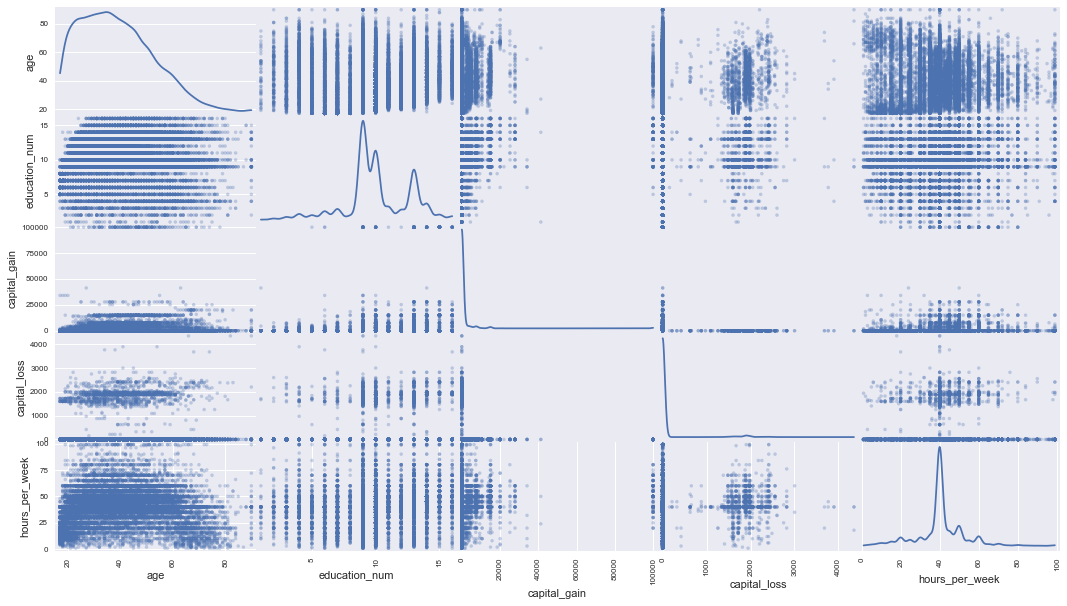

In [234]:
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (18,10), diagonal = 'kde');
plt.savefig("pairplot.png")

## Création d'une classe

### Version 1

In [103]:
class Adult_v1:
    def __init__(self):
        self.age= 38
        self.education='HS-grad'
        self.workclass='Private'
        self.sex='Male'
        self.race='White'

On peut créer une classe sans paramètres à l'initialisation, en entrant des valeurs pré-définies. On peut maintenant créer un objet appartenant à la classe Adult_v1 de la façon suivante.

In [104]:
Jean=Adult_v1()
Jean

In [105]:
[Jean.age, Jean.education, Jean.workclass, Jean.sex, Jean.race]

[38, 'HS-grad', 'Private', 'Male', 'White']

Ces valeurs sont modifiables.

In [106]:
Jean.education='Masters'
Jean.education

'Masters'

### Version 2

On crée maintenant une classe avec les paramètres sélectionnables à l'initialisation.

In [107]:
class Adult_v2:
    def __init__(self, age, education, workclass, sex, race):
        self.age= age
        self.education=education
        self.workclass=workclass
        self.sex=sex
        self.race=race

In [108]:
Julie=Adult_v2(22, 'Masters', 'Private', 'Female', 'Black')
[Julie.age, Julie.education, Julie.workclass, Julie.sex, Julie.race]

[22, 'Masters', 'Private', 'Female', 'Black']

In [109]:
class Adult_v3:
    def __init__(self, age, education, workclass, sex, race):
        self.age= age
        self.education=education
        self.workclass=workclass
        self.sex=sex
        self.race=race
        
    def estAdulte(self):
        return self.age >=18
    
    def __repr__(self):
        if self.estAdulte:
            return "Cette personne a {} ans, avec le niveau d'éducation {}.\\
                Elle travaille dans le secteur {}. Cette personne est de sexe {}\\
                et est d'origine {}".format(self.age, self.education, self.workclass, self.sex, self.race)
        
    def estPlusAge(self, age):
        return self.age >= age

    
    

In [110]:
Julie=Adult_v3(22, 'Masters', 'Private', 'Female', 'Black')

In [111]:
Marc=Adult_v3(35, 'Doctorate','Self-emp-inc', 'Male', 'White')

In [112]:
Louis=Adult_v3(15, '8th-grad','Private', 'Male', 'White')

In [113]:
Julie.estAdulte()

True

In [114]:
Marc.estAdulte()

True

In [115]:
Louis.estAdulte()

False

In [116]:
repr(Julie)

"Cette personne a 22 ans, avec le niveau d'éducation Masters.\\                Elle travaille dans le secteur Private. Cette personne est de sexe Female\\                et est d'origine Black"

In [117]:
repr(Marc)

"Cette personne a 35 ans, avec le niveau d'éducation Doctorate.\\                Elle travaille dans le secteur Self-emp-inc. Cette personne est de sexe Male\\                et est d'origine White"

In [118]:
Julie.estPlusAge(Marc.age)

False

## Traitement des données

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### Nettoyage et recodage des variables

In [24]:
np.count_nonzero(df.isnull())  

0

In [25]:
df2=df.drop(['native_country','education','occupation','relationship'], axis=1)
df2.head()

,age,workclass,education_num,marital_status,race,sex,capital_gain,capital_loss,hours_per_week,income
0,39,State-gov,13,Never-married,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,White,Male,0,0,13,<=50K
2,38,Private,9,Divorced,White,Male,0,0,40,<=50K
3,53,Private,7,Married-civ-spouse,Black,Male,0,0,40,<=50K
4,28,Private,13,Married-civ-spouse,Black,Female,0,0,40,<=50K


In [26]:
df3= pd.get_dummies(df2, columns = ['workclass','marital_status','race'],
                                prefix = ['wc','ms','race'])
df3.head()

,age,education_num,sex,capital_gain,capital_loss,hours_per_week,income,wc_ ?,wc_ Federal-gov,wc_ Local-gov,...,ms_ Married-civ-spouse,ms_ Married-spouse-absent,ms_ Never-married,ms_ Separated,ms_ Widowed,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,13,Male,2174,0,40,<=50K,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,50,13,Male,0,0,13,<=50K,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,38,9,Male,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,53,7,Male,0,0,40,<=50K,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,28,13,Female,0,0,40,<=50K,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [27]:
le=preprocessing.LabelEncoder()
df3['sex'] = le.fit_transform(df3['sex']) 
df3['income'] = le.fit_transform(df3['income']) 

In [28]:
df3.head()
# Female -> 0
# Male -> 1
# <=50k -> 0
# > 50k -> 1

,age,education_num,sex,capital_gain,capital_loss,hours_per_week,income,wc_ ?,wc_ Federal-gov,wc_ Local-gov,...,ms_ Married-civ-spouse,ms_ Married-spouse-absent,ms_ Never-married,ms_ Separated,ms_ Widowed,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,13,1,2174,0,40,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,50,13,1,0,0,13,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,38,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,53,7,1,0,0,40,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,28,13,0,0,0,40,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


### Séparation test / training set

In [54]:
X = df3.drop('income', axis=1)
y = df3['income']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Classification

In [202]:
# K-plus-proches-voisins
from sklearn import neighbors
# Régression logistique
from sklearn import linear_model
# Arbre de décision
from sklearn import tree
# Random Forest
from sklearn import ensemble

# Vérification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### K-plus-proches-voisins

#### Implémentation par défaut

In [57]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', 
                                     leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)

In [58]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [59]:
y_predict = knn.predict(X_test)

In [60]:
accuracy_score(y_test, y_predict)

0.84141997297629278

#### Essai d'optimisation 1 : sur les poids

In [62]:
knn2 =  neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', 
                                     leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)
knn2.fit(X_train, y_train)
y_predict2 = knn2.predict(X_test)
accuracy_score(y_test, y_predict2)

0.83798059206485687

#### Essai d'optimisation 2 : sur l'algorithme

In [63]:
knn3 =  neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='ball_tree', 
                                     leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)
knn3.fit(X_train, y_train)
y_predict3 = knn3.predict(X_test)
accuracy_score(y_test, y_predict3)

0.84154280800884407

In [64]:
knn4 =  neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='kd_tree', 
                                     leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)
knn4.fit(X_train, y_train)
y_predict4 = knn4.predict(X_test)
accuracy_score(y_test, y_predict4)

0.84141997297629278

#### Essai d'optimisation 3 : nombre de voisins

Pour le nombre de voisins par défaut n=5, on a trouvé que la méthode des poids uniformes associée à l'algorithme BallTree était légèrement plus efficace. Nous allons donc essayer de faire tourner ce modèle avec différents nombre de voisins.

In [65]:
knn5 =  neighbors.KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='ball_tree', 
                                     leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)
knn5.fit(X_train, y_train)
y_predict5 = knn5.predict(X_test)
accuracy_score(y_test, y_predict5)

0.81709863653113868

In [66]:
knn6 =  neighbors.KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='ball_tree', 
                                     leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)
knn6.fit(X_train, y_train)
y_predict6 = knn6.predict(X_test)
accuracy_score(y_test, y_predict6)

0.85198378577570322

#### Modèle choisi

In [115]:
knn_final =  neighbors.KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='ball_tree', 
                                     leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)
knn_final.fit(X_train, y_train)
y_pred_knn = knn_final.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.85198378577570322

In [116]:
knn_confusion=pd.DataFrame(confusion_matrix(y_test, y_pred_knn),
    columns=['Predicted <=50', 'Predicted >50'],
    index=['True <=50', 'True >50'])
knn_confusion

,Predicted <=50,Predicted >50
True <=50,5884,419
True >50,786,1052


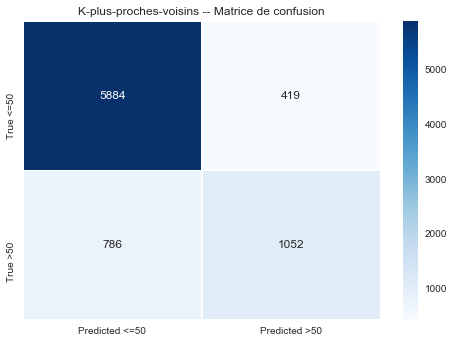

In [117]:
plt.title('K-plus-proches-voisins -- Matrice de confusion')
sns.heatmap(knn_confusion, annot=True,fmt="d", linewidths=.5, cmap="Blues")
# fmt = "d" -> format décimal pour les annotations
plt.savefig("knn_confusion.png")

In [118]:
fpr, tpr, threshold= roc_curve(y_test, y_pred_knn)
knn_auc= auc(fpr, tpr)

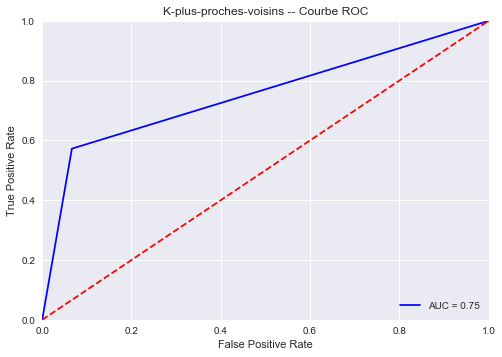

In [119]:
plt.title('K-plus-proches-voisins -- Courbe ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % knn_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("knn_roc.png")

### Régression logistique

#### Implémentation par défaut

In [95]:
lr = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                                intercept_scaling=1, class_weight=None, random_state=None, 
                                solver='liblinear', max_iter=100, multi_class='ovr', 
                                verbose=0, warm_start=False, n_jobs=1)

In [96]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
y_predict=lr.predict(X_test)

In [98]:
accuracy_score(y_test,y_predict)

0.8478073946689596

#### Essai des différents solver

In [100]:
lr2 = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                                intercept_scaling=1, class_weight=None, random_state=None, 
                                solver='newton-cg', max_iter=100, multi_class='ovr', 
                                verbose=0, warm_start=False, n_jobs=1)
lr2.fit(X_train, y_train)
y_predict2=lr2.predict(X_test)
accuracy_score(y_test,y_predict2)

0.84768455963640832

In [101]:
lr3 = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                                intercept_scaling=1, class_weight=None, random_state=None, 
                                solver='lbfgs', max_iter=100, multi_class='ovr', 
                                verbose=0, warm_start=False, n_jobs=1)
lr3.fit(X_train, y_train)
y_predict3=lr3.predict(X_test)
accuracy_score(y_test,y_predict3)

0.81034270974081812

In [104]:
lr4 = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                                intercept_scaling=1, class_weight=None, random_state=None, 
                                solver='sag', max_iter=1000, multi_class='ovr', 
                                verbose=0, warm_start=False, n_jobs=1)
lr4.fit(X_train, y_train)
y_predict4=lr4.predict(X_test)
accuracy_score(y_test,y_predict4)

0.80567497850386927

#### Essais avec solver liblinear

In [106]:
lr5 = linear_model.LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                                intercept_scaling=1, class_weight=None, random_state=None, 
                                solver='liblinear', max_iter=100, multi_class='ovr', 
                                verbose=0, warm_start=False, n_jobs=1)
lr5.fit(X_train, y_train)
y_predict5=lr5.predict(X_test)
accuracy_score(y_test,y_predict5)

0.84768455963640832

In [107]:
lr6 = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                                intercept_scaling=1, class_weight='balanced', random_state=None, 
                                solver='liblinear', max_iter=100, multi_class='ovr', 
                                verbose=0, warm_start=False, n_jobs=1)
lr6.fit(X_train, y_train)
y_predict6=lr6.predict(X_test)
accuracy_score(y_test,y_predict6)

0.77484338533349706

#### Modèle choisi

In [120]:
lr_final = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                                intercept_scaling=1, class_weight=None, random_state=None, 
                                solver='liblinear', max_iter=100, multi_class='ovr', 
                                verbose=0, warm_start=False, n_jobs=1)
lr_final.fit(X_train, y_train)
y_pred_lr=lr_final.predict(X_test)
accuracy_score(y_test,y_pred_lr)

0.8478073946689596

In [121]:
lr_confusion=pd.DataFrame(confusion_matrix(y_test, y_pred_lr),
    columns=['Predicted <=50', 'Predicted >50'],
    index=['True <=50', 'True >50'])
lr_confusion

,Predicted <=50,Predicted >50
True <=50,5846,457
True >50,782,1056


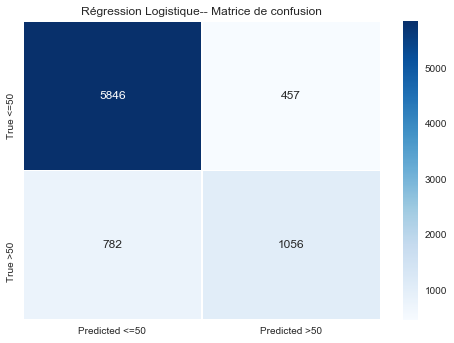

In [200]:
plt.title('Régression Logistique-- Matrice de confusion')
sns.heatmap(lr_confusion, annot=True,fmt="d", linewidths=.5, cmap="Blues")
# fmt = "d" -> format décimal pour les annotations
plt.savefig("lr_confusion.png")

In [197]:
fpr, tpr, threshold= roc_curve(y_test, y_pred_lr)
lr_auc= auc(fpr, tpr)

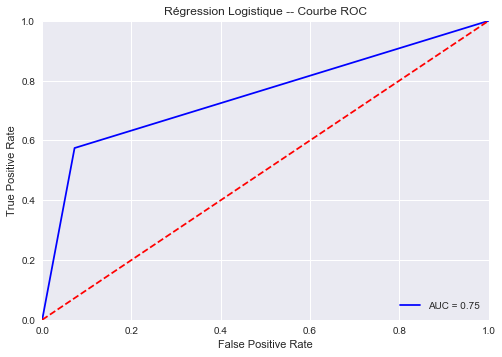

In [124]:
plt.title('Régression Logistique -- Courbe ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("lr_roc.png")

### Arbre de décision

#### Implémentation par défaut

In [138]:
dt = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                  random_state=None, max_leaf_nodes=None, class_weight=None, presort=False)

In [139]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [140]:
y_predict = dt.predict(X_test)

In [141]:
accuracy_score(y_test, y_predict)

0.8291364697211645

In [160]:
dt.fit(X_train, y_train).tree_.max_depth 

45

#### Critère : entropy

In [167]:
dt2 = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                  random_state=None, max_leaf_nodes=None, class_weight=None, presort=False)
dt2.fit(X_train, y_train)
y_predict2=dt2.predict(X_test)
accuracy_score(y_test,y_predict2)

0.83048765507922861

In [168]:
dt2.fit(X_train, y_train).tree_.max_depth 

48

#### Profondeur de l'arbre

In [191]:
dt3 = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                  random_state=None, max_leaf_nodes=None, class_weight=None, presort=False)
dt3.fit(X_train, y_train)
y_predict3=dt3.predict(X_test)
accuracy_score(y_test,y_predict3)

0.86316177373787006

In [187]:
dt4 = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10, min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                  random_state=None, max_leaf_nodes=None, class_weight=None, presort=False)
dt4.fit(X_train, y_train)
y_predict4=dt4.predict(X_test)
accuracy_score(y_test,y_predict4)

0.86156491831470339

#### Modèle choisi

In [192]:
dt_final = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                  random_state=None, max_leaf_nodes=None, class_weight=None, presort=False)
dt_final.fit(X_train, y_train)
y_pred_dt=dt_final.predict(X_test)
accuracy_score(y_test,y_pred_dt)

0.8636531138680752

In [193]:
dt_confusion=pd.DataFrame(confusion_matrix(y_test, y_pred_dt),
    columns=['Predicted <=50', 'Predicted >50'],
    index=['True <=50', 'True >50'])
dt_confusion

,Predicted <=50,Predicted >50
True <=50,5922,381
True >50,729,1109


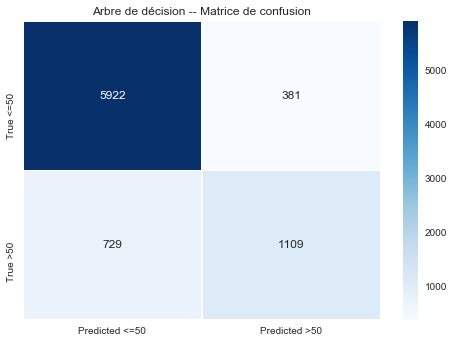

In [198]:
plt.title('Arbre de décision -- Matrice de confusion')
sns.heatmap(dt_confusion, annot=True,fmt="d", linewidths=.5, cmap="Blues")
# fmt = "d" -> format décimal pour les annotations
plt.savefig("dt_confusion.png")

In [196]:
fpr, tpr, threshold= roc_curve(y_test, y_pred_dt)
dt_auc= auc(fpr, tpr)

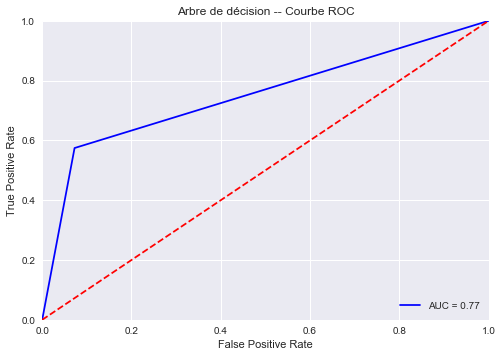

In [199]:
plt.title('Arbre de décision -- Courbe ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % dt_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("dt_roc.png")

### Random Forest

#### Implémentation par défaut

In [209]:
rf = ensemble.RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                       max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, 
                       random_state=None, verbose=0, warm_start=False, class_weight=None)

In [210]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [211]:
y_predict = rf.predict(X_test)

In [212]:
accuracy_score(y_test, y_predict)

0.84584203414813908

#### Nombre d'arbres

In [221]:
rf2 = ensemble.RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2,
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                       max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, 
                       random_state=None, verbose=0, warm_start=False, class_weight=None)
rf2.fit(X_train, y_train)
y_predict = rf2.predict(X_test)
accuracy_score(y_test, y_predict)

0.8478073946689596

#### Modèle final

In [218]:
rf_final = ensemble.RandomForestClassifier(n_estimators=350, criterion='gini', max_depth=None, min_samples_split=2,
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                       max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, 
                       random_state=None, verbose=0, warm_start=False, class_weight=None)
rf_final.fit(X_train, y_train)
y_pred_rf = rf_final.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.84940425009212628

In [222]:
rf_confusion=pd.DataFrame(confusion_matrix(y_test, y_pred_rf),
    columns=['Predicted <=50', 'Predicted >50'],
    index=['True <=50', 'True >50'])
rf_confusion

,Predicted <=50,Predicted >50
True <=50,5763,540
True >50,686,1152


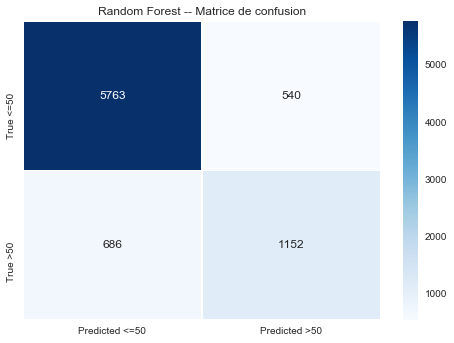

In [223]:
plt.title('Random Forest -- Matrice de confusion')
sns.heatmap(rf_confusion, annot=True,fmt="d", linewidths=.5, cmap="Blues")
# fmt = "d" -> format décimal pour les annotations
plt.savefig("rf_confusion.png")

In [224]:
fpr, tpr, threshold= roc_curve(y_test, y_pred_rf)
rf_auc= auc(fpr, tpr)

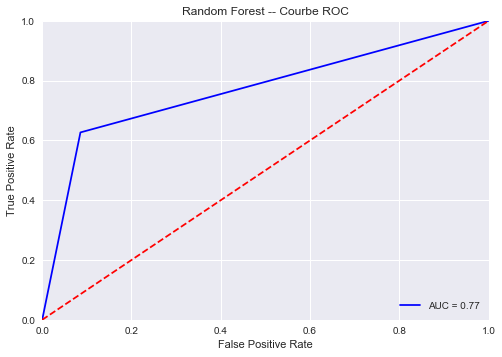

In [225]:
plt.title('Random Forest -- Courbe ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("rf_roc.png")